In [3]:
import numpy as np
import linreg
import matplotlib.pyplot as plt

import pylab

# Changing plot sizes
pylab.rcParams['figure.figsize'] = (14, 5)

# Exercise 1

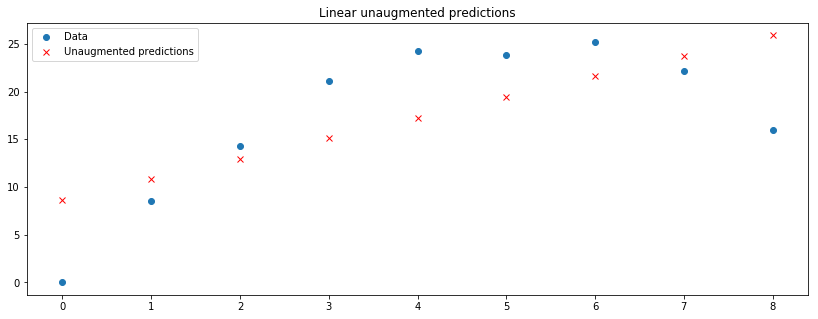

Augmented with order 2 ...


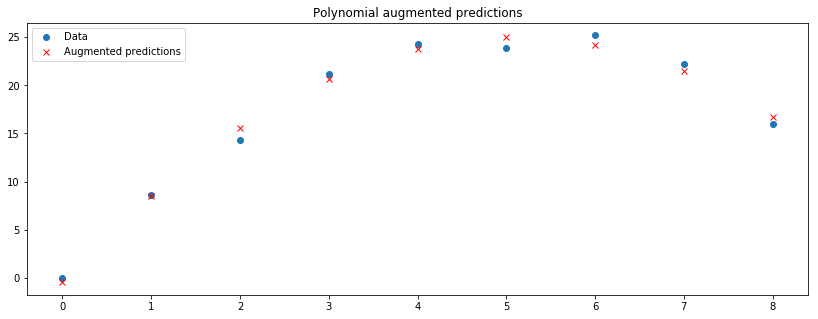

Augmented with order 2 ...
Our resulting function looks as follows: f(x) = -0.9788095238095242x^2 + 9.982809523809527x + -0.4659999999999926
Cannon Position is: -0.4659999999999926


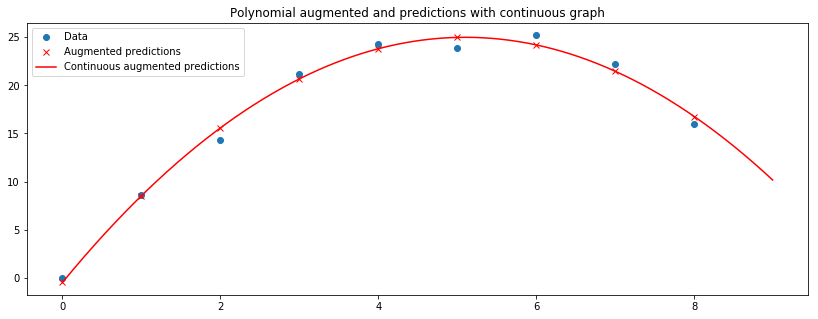

Augmented with order 2 ...
[[-0.466     ]
 [ 9.98280952]
 [-0.97880952]]
Cannon Position is: 0.0
Subtracting the value -0.4659999999999926 to have the model intersect [0,0]


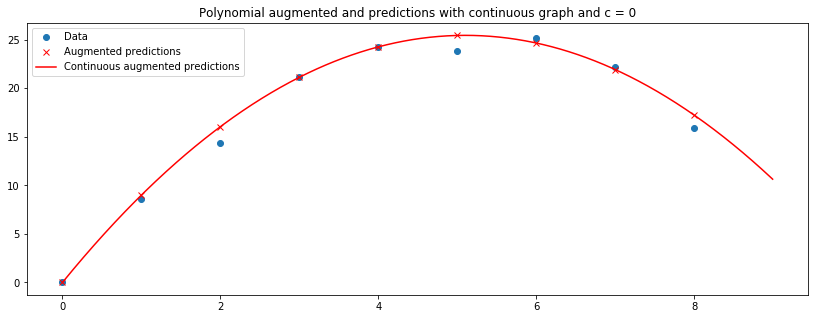

In [4]:
def augment(X, max_order):
    """ Augments a given data
    matrix by adding additional 
    columns.
    
    NOTE: In case max_order is very large, 
    numerical inaccuracies might occur
    """
    
    X_augmented = X
    
    for i in range(2, max_order+1):
        print("Augmented with order %i ..." % i)
        X_augmented = np.concatenate([X_augmented, X**i], axis=1)
        
    return X_augmented

max_degree = 2
flight = np.array(
     [[0,0    ],
      [1,08.57],
      [2,14.33],
      [3,21.13],
      [4,24.29],
      [5,23.85],
      [6,25.19],
      [7,22.19],
      [8,15.96]])
X = flight[:,0]
t = flight[:,-1]
X = X.reshape((len(X),1))
t = t.reshape((len(t), 1))

# First plot
plt.title("Linear unaugmented predictions")
model = linreg.LinearRegression()
model.fit(X,t)
predicts = model.predict(X)
plt.plot(X,t, 'o', linestyle='none', label='Data')
plt.plot(X, predicts, 'x', color='red', linestyle='none',  label='Unaugmented predictions')
plt.legend()
plt.show()

# Second plot
plt.title("Polynomial augmented predictions")
flightAug = augment(X, max_degree)
model2 = linreg.LinearRegression()
model2.fit(flightAug,t)
newpreds = model2.predict(flightAug)
plt.plot(flight[:,0], t, 'o', linestyle='none', label='Data')
plt.plot(flightAug[:,0], newpreds, 'x', color='red', linestyle='none',  label='Augmented predictions')
plt.legend()
plt.show()

# Third plot
plt.title("Polynomial augmented and predictions with continuous graph")
Xplot = np.arange(0, len(flight), 0.01)
Xplot = Xplot.reshape((len(Xplot), 1))
Xplot = augment(Xplot, max_degree)
preds_plot = model2.predict(Xplot)

plt.plot(flightAug[:,0], t, 'o',linestyle='none', label='Data')
plt.plot(flightAug[:,0], newpreds, 'x', color='red', label='Augmented predictions')
plt.plot(Xplot[:,0], preds_plot, '-', color='red', label='Continuous augmented predictions')
plt.legend()

print("Our resulting function looks as follows: f(x) = {}x^2 + {}x + {}".format(model2.w[2,0], model2.w[1,0], model2.w[0,0]))
print("Cannon Position is: {}".format(preds_plot[0,0]))
ccancel = model2.w[0,0]
plt.show()

## Fourth plot
plt.title("Polynomial augmented and predictions with continuous graph and c = 0")
Xplot = np.arange(0, len(flight), 0.01)
Xplot = Xplot.reshape((len(Xplot), 1))
Xplot = augment(Xplot, max_degree)
preds_plot = model2.predict(Xplot) - ccancel

plt.plot(flightAug[:,0], t, 'o',linestyle='none', label='Data')
plt.plot(flightAug[:,0], newpreds - ccancel, 'x', color='red', label='Augmented predictions')
plt.plot(Xplot[:,0], preds_plot, '-', color='red', label='Continuous augmented predictions')
plt.legend()

print(model2.w)
print("Cannon Position is: {}".format(preds_plot[0,0]))
print("Subtracting the value {} to have the model intersect [0,0]".format(ccancel))
plt.show()

# Exercise 2a

Lowest Cross validation error: 0.062431205220252715
Lowest Cross validation error lambda: 4.1026581058271904e-07
Optimal regression coefficient  0 for lambda=0: 36.416455902501703
Optimal regression coefficient  1 for lambda=0: -0.013330885710960
Optimal regression coefficient  0 for optimal lambda: 36.370029776694480
Optimal regression coefficient  1 for optimal lambda: -0.013307113989604


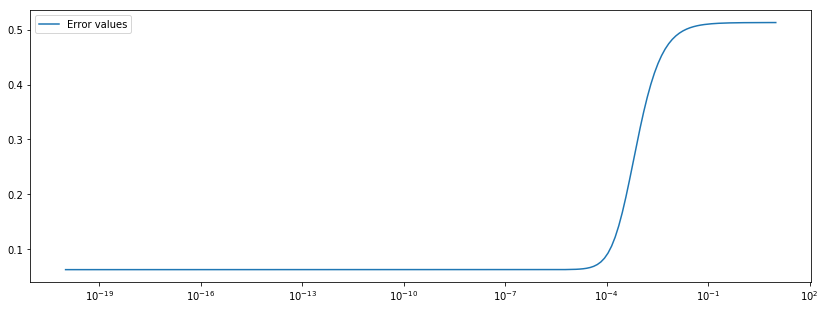

In [5]:
data = np.loadtxt("men-olympics-100.txt")
years = data[:,0]
time1 = data[:,1]

test = np.logspace(-20, 1, 200, base=10)

time1 = time1.reshape((len(time1),1))
years = years.reshape((len(years),1))

def printWeights(t, tp, loocv, augNum):
    zeromodel = linreg.LinearRegression()
    zeromodel.fit(augment(t,augNum),tp)
    
    optmodel = linreg.LinearRegression(loocv)
    optmodel.fit(augment(t,augNum),tp)
    
    for i in range(len(zeromodel.w)):
        print("Optimal regression coefficient ", i, "for lambda=0: %.15f" % zeromodel.w[i])
    for i in range(len(optmodel.w)):
        print("Optimal regression coefficient ", i, "for optimal lambda: %.15f" % optmodel.w[i])


def loocv(x,t, lambdas):
    retval = [None] * len(lambdas)
    
    for i in range(len(lambdas)):
        temps = [None] * len(x)
        
        for j in range(len(x)):
            x_cur = [y for i, y in enumerate(x) if i!=j]
            t_cur = [y for i, y in enumerate(t) if i!=j]
            cur_model=linreg.LinearRegression(lambdas[i])
            cur_model.fit(x_cur,t_cur)
            predictions = cur_model.predict([x[j]])
            temps[j] = 1/len(x)*np.sum(abs(predictions-t[j])**2)
            
        retval[i] = np.sum(temps)
        
    return retval
    
print("Lowest Cross validation error: {}".format(np.min(loocv(years,time1,test))))
temp = loocv(years,time1,test)
loocvLam = test[temp.index(np.min(loocv(years,time1,test)))]
print("Lowest Cross validation error lambda: {}".format(loocvLam))


printWeights(years, time1, loocvLam, 0)

plt.xscale('log')
plt.plot(test,loocv(years,time1,test), label='Error values')
plt.legend()
plt.show()

# Exercise 2b

Augmented with order 2 ...
Augmented with order 3 ...
Augmented with order 2 ...
Augmented with order 3 ...
Augmented with order 2 ...
Augmented with order 3 ...
Lowest Cross validation error: 0.05211899812039302
Lowest Cross validation error lambda: 5.7384416483024045e-12
Augmented with order 2 ...
Augmented with order 3 ...
Augmented with order 2 ...
Augmented with order 3 ...
Optimal regression coefficient  0 for lambda=0: 23681.784113798094040
Optimal regression coefficient  1 for lambda=0: -36.143351092756703
Optimal regression coefficient  2 for lambda=0: 0.018398029257042
Optimal regression coefficient  3 for lambda=0: -0.000003122169400
Optimal regression coefficient  0 for optimal lambda: 17274.107025589299155
Optimal regression coefficient  1 for optimal lambda: -26.295047966700455
Optimal regression coefficient  2 for optimal lambda: 0.013353480800001
Optimal regression coefficient  3 for optimal lambda: -0.000002261010014
Augmented with order 2 ...
Augmented with order 3 ..

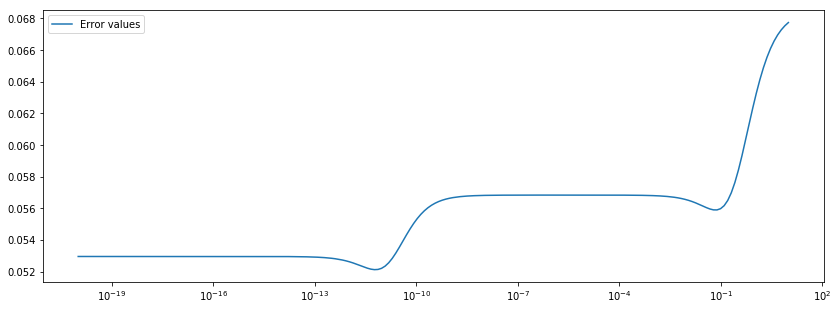

In [6]:
data = np.loadtxt("men-olympics-100.txt")
years = data[:,0]
times = data[:,1]
test = np.logspace(-20, 1, 200, base=10)

times = times.reshape((len(times),1))
years = years.reshape((len(years),1))

def newLoocv(x,t, lambdas):
    
    retval = [None] * len(lambdas)
    x = x.reshape(len(x), 1)
    x = augment(x, 3)
    
    for i in range(len(lambdas)):
        temps = [None] * len(x)
        
        for j in range(len(x)):
            x_cur = [y for i, y in enumerate(x) if i!=j]
            t_cur = [y for i, y in enumerate(t) if i!=j]
            cur_model=linreg.LinearRegression(lambdas[i])
            cur_model.fit(x_cur,t_cur)
            predictions = cur_model.predict([x[j]])
            temps[j] = 1/len(x)*np.sum(abs(predictions-t[j])**2)
            
        retval[i] = np.sum(temps)
        
    return retval

temp = newLoocv(years,times,test)
loocvLam = test[temp.index(np.min(newLoocv(years,times,test)))]
print("Lowest Cross validation error: {}".format(np.min(newLoocv(years,time1,test))))
print("Lowest Cross validation error lambda: {}".format(loocvLam))

printWeights(years,time1, loocvLam, 3)

plt.xscale('log')
plt.plot(test,newLoocv(years,times,test), label='Error values')
plt.legend()
plt.show()

# Exercise 3

In [7]:
sevens = np.loadtxt('MNISTsevens.txt', delimiter=',').T
ones   = np.loadtxt('MNISTones.txt'  , delimiter=',').T
combData = np.concatenate((ones, sevens))
print("Shape of input: {}x{}".format(len(combData[:,0]), len(combData[0,:])))

Shape of input: 15170x784


In [8]:
# %load pca.py
# input: datamatrix as loaded by numpy.loadtxt('MNISTones.txt', delimiter=',')
# output: a tuple consisting of: 1) the eigenvalues in a vector
#                                2) the unit eigenvectors in a matrix with each column being an eigenvector

def center(data):
    return data - data.mean(axis=0)

def covar(data):
    ndata = center(data)
    return ndata.T @ ndata

def pca(data):
    temp = np.linalg.eigh(covar(data))
    retvals = np.flip(temp[0])
    retvecs = temp[1][:,::-1]
    return retvals, retvecs
    
#print(np.max(covar(combData)))
eigVals, eigVecs = pca(combData)
print("Largest eigenvalue: {}".format(eigVals[0]))

Largest eigenvalue: 135532.65713932805


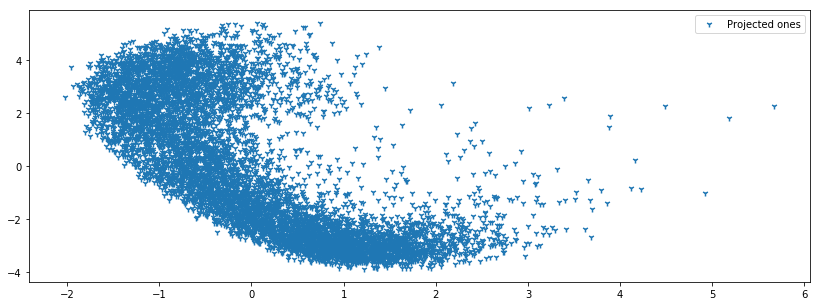

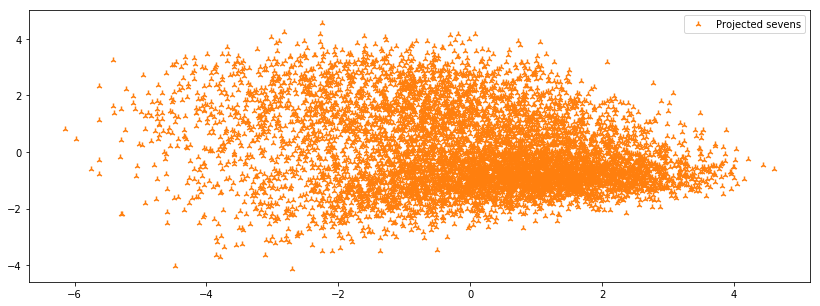

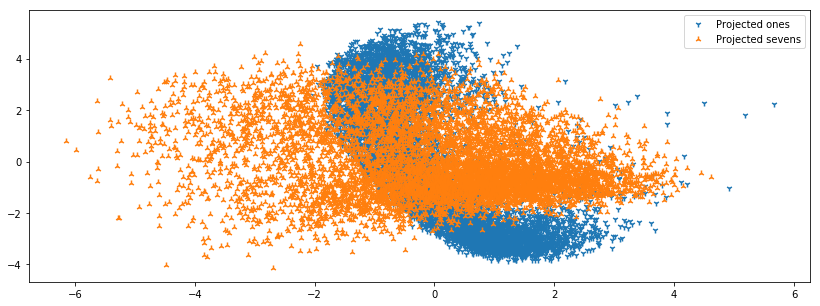

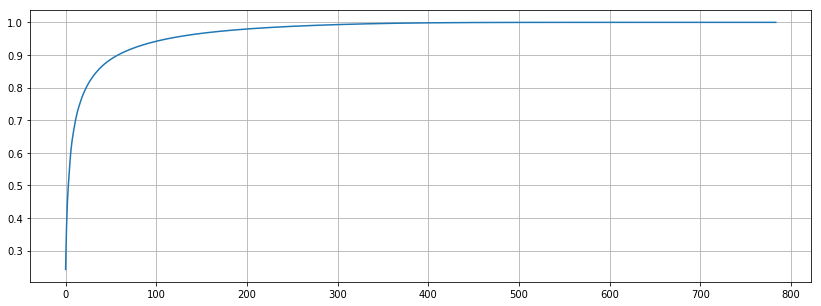

Proportion of variance explained by the first 2 principal components: 36.85149126484449%
Proportion of variance explained by the first 5 principal components: 54.02710213242546%
You need 114 components to explain 95.0% of the variance


In [9]:
proj1Ones = center(ones) @ eigVecs[:,0]
proj2Ones = center(ones) @ eigVecs[:,1]
proj1Sevens = center(sevens) @ eigVecs[:,0]
proj2Sevens = center(sevens) @ eigVecs[:,1]

# Return all the values, for plotting
def varPerComPlot(eigenvalues):
    return np.cumsum(eigenvalues/np.sum(eigenvalues))

# Return the single percentage for k principal components
def varPerComNum(eigenvalues, k):
    if (k > 0):
        temp = np.cumsum(eigenvalues/np.sum(eigenvalues))
        return temp[k-1]
    else:
        return None

# First plot
plt.scatter(proj1Ones, proj2Ones,marker='1', label='Projected ones')
plt.legend()
plt.show()

# Second plot
plt.scatter(proj1Sevens, proj2Sevens, marker='2', label='Projected sevens', color='#ff7f0e')
plt.legend()
plt.show()

# Third plot
plt.scatter(proj1Ones, proj2Ones,marker='1', label='Projected ones')
plt.scatter(proj1Sevens, proj2Sevens, marker='2', label='Projected sevens', color='#ff7f0e')
plt.legend()
plt.show()

# Fourth plot
plt.plot(varPerComPlot(eigVals))
plt.grid(True)
plt.show()

def findPerc(eigenvalues, perc):
    for i in range(1,len(eigenvalues)):
        if (varPerComNum(eigenvalues,i) >= perc):
            return i
    return None

k = 2
print("Proportion of variance explained by the first {} principal components: {}%".format(k,varPerComNum(eigVals,k)*100))

k = 5
print("Proportion of variance explained by the first {} principal components: {}%".format(k,varPerComNum(eigVals,k)*100))

percentage = 0.95
print("You need {} components to explain {}% of the variance".format(findPerc(eigVals, percentage), percentage*100))

# Exercise 4

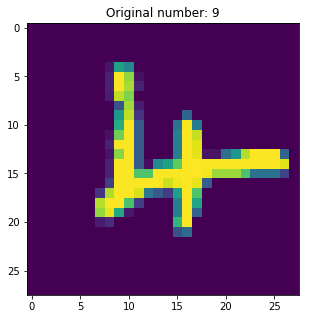

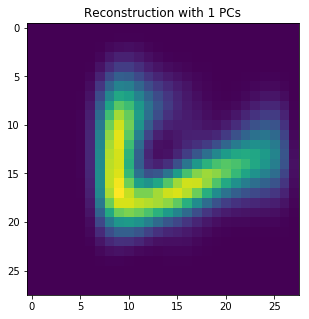

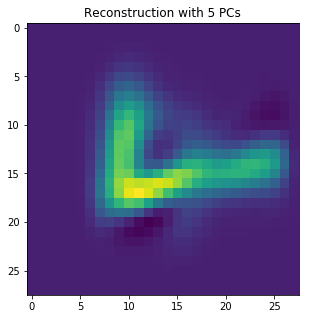

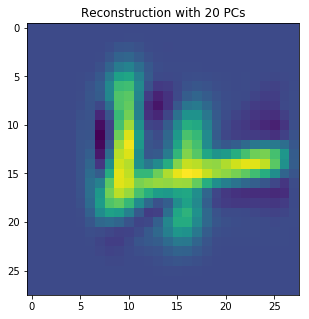

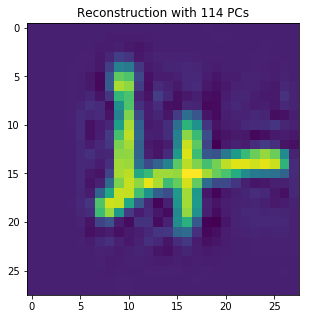

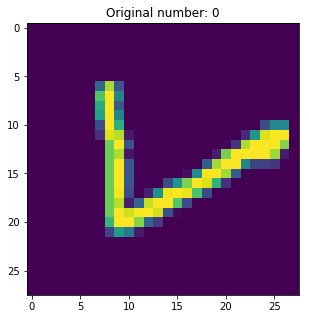

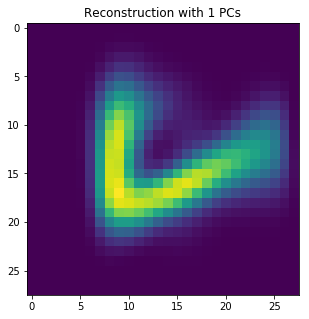

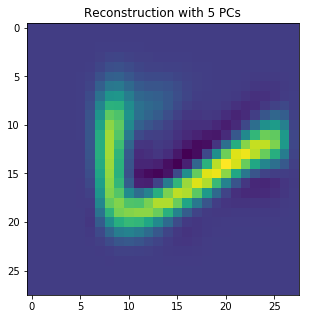

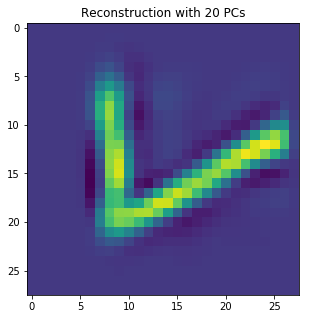

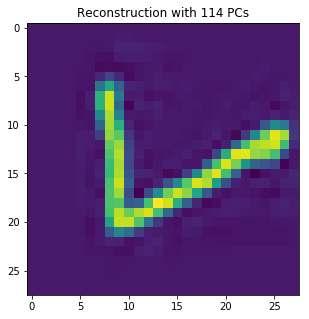

In [144]:
# input:  image: 	The image to be reconstructed, represented as a 784-dimensional vector, stored as a 784 x 1 numpy array
#	  data:  	The dataset used to build the PCA model, stored as a 784 x N numpy array
# 	  num_comp:	The number of principal components used for the reconstruction, an integer
# output: recon:	The reconstructed image, represented as a 784-dimensional vector, stored as a 784 x 1 numpy array

def pcarecon(image, data, num_comp):
    _, dataVecs = pca(data)
    recon = np.dot((data - data.mean(axis=0)), np.dot(dataVecs[:,0:num_comp], dataVecs[:,0:num_comp].T))
    recon += data.mean(axis=0)
    #assert np.allclose(data[image], recon[image])
    
    #print(recon.shape)
    return recon[image]

def newArr(tuple):
    retVal = np.zeros((len(tuple),1))
    for i in range(len(tuple)):
        retVal[i] = tuple[i]
    retVal = retVal.reshape((28,28))
    return retVal

testImage = 9
pcaNum = 1
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Original number: {}".format(testImage))
plt.imshow(newArr(sevens[t]))
plt.show()
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 5
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 20
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 114
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

testImage = 0
pcaNum = 1
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Original number: {}".format(testImage))
plt.imshow(newArr(sevens[testImage]))
plt.show()
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 5
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 20
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 114
temp = pcarecon(testImage,sevens,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

#print(temp)

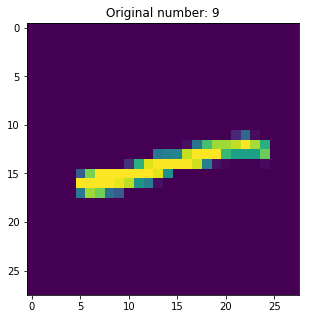

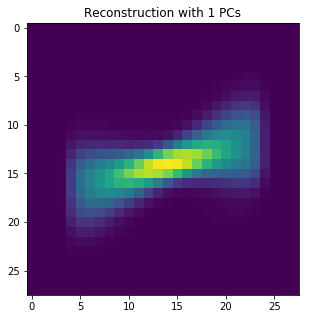

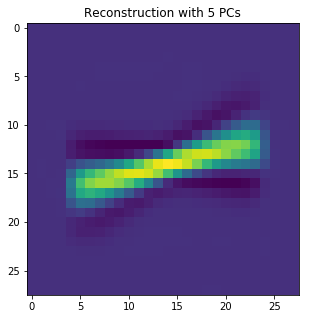

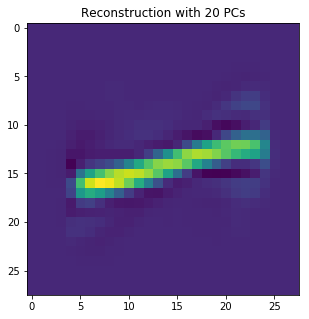

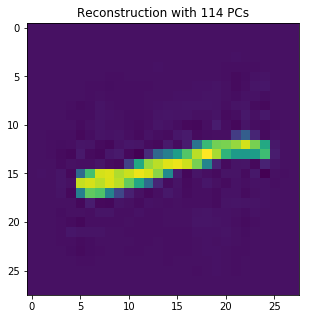

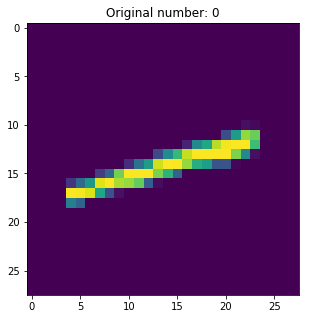

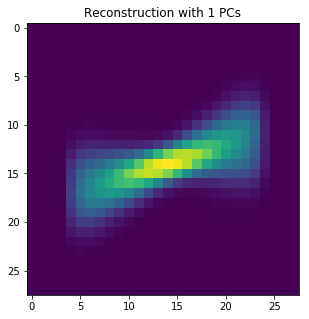

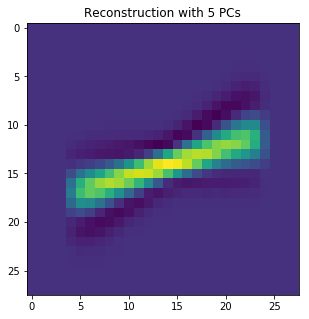

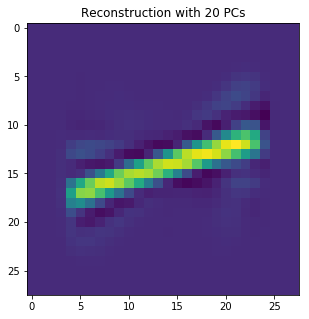

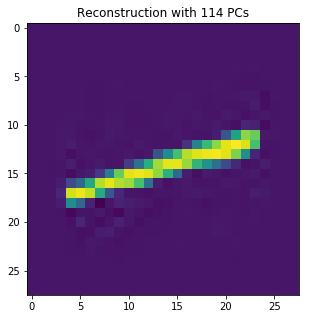

In [145]:
testImage = 9
pcaNum = 1
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Original number: {}".format(testImage))
plt.imshow(newArr(ones[t]))
plt.show()
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 5
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 20
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 114
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

testImage = 0
pcaNum = 1
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Original number: {}".format(testImage))
plt.imshow(newArr(ones[testImage]))
plt.show()
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 5
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 20
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()

pcaNum = 114
temp = pcarecon(testImage,ones,pcaNum)
plt.title("Reconstruction with {} PCs".format(pcaNum))
plt.imshow(newArr(temp))
plt.show()